In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import natsort
from statsmodels.stats.multitest import multipletests

# pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [65]:
gene_type = 'homo'

expression = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/\
mapping/gene_expression/gene_expression_'+gene_type+'.tsv',\
                          encoding='utf8')

In [66]:
metadata = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/metadata.tsv',
                        header=None, skiprows=[0], names=['sample', 'diabetes'])

In [67]:
expression

chrom  length  bases  mean  min  max   sample
0     h1    1509    19     0.01  0    1    M5.1-V1
1     h2    1350    39     0.03  0    1    M5.1-V1
2     h3    1419    119    0.08  0    5    M5.1-V1
3     h4    1155    40     0.03  0    2    M5.1-V1
4     h5    999     19     0.02  0    1    M5.1-V1
...   ..    ...     ..      ... ..   ..        ...
1353  h40   504     19     0.04  0    1    M4.6-V3
1354  h41   219     19     0.09  0    1    M4.6-V3
1355  h42   579     19     0.03  0    1    M4.6-V3
1356  h44   507     40     0.08  0    1    M4.6-V3
1357  h45   393     59     0.15  0    2    M4.6-V3

[1358 rows x 7 columns]

In [68]:
df = expression['sample'].str.split('-').str[0]
expression['sample'] = df

In [69]:
expression = expression.merge(metadata)

In [70]:
expression

chrom  length  bases  mean  min  max sample diabetes
0     h1    1509    19     0.01  0    1    M5.1   yes    
1     h2    1350    39     0.03  0    1    M5.1   yes    
2     h3    1419    119    0.08  0    5    M5.1   yes    
3     h4    1155    40     0.03  0    2    M5.1   yes    
4     h5    999     19     0.02  0    1    M5.1   yes    
...   ..    ...     ..      ... ..   ..     ...   ...    
1353  h40   504     19     0.04  0    1    M4.6   no     
1354  h41   219     19     0.09  0    1    M4.6   no     
1355  h42   579     19     0.03  0    1    M4.6   no     
1356  h44   507     40     0.08  0    1    M4.6   no     
1357  h45   393     59     0.15  0    2    M4.6   no     

[1358 rows x 8 columns]

In [71]:
expression_processed = expression.groupby(['diabetes', 'chrom', 'sample'], as_index=False)\
.agg({'mean':'mean'})\
.rename(columns={'mean':'mean_abundance'}).round(2)

expression_processed.head()

diabetes chrom sample  mean_abundance
0  no       h1    M1.2   0.11          
1  no       h1    M1.3   0.08          
2  no       h1    M11.4  0.07          
3  no       h1    M4.1   0.04          
4  no       h1    M4.4   0.17

In [72]:
# expression.groupby(['diabetes', 'chrom'])\
# .agg({'mean':'mean'})\
# .rename(columns={'mean':'mean_abundance'}).round(2)

In [73]:
gene_abundance = expression_processed.groupby(['chrom'], as_index=False).agg({'mean_abundance':'mean'})
gene_abundance = gene_abundance.iloc[natsort.index_humansorted(gene_abundance['chrom'])]
gene_abundance.head()

# gene_abundance = expression_processed.groupby(['diabetes', 'chrom'], as_index=False).agg({'mean_abundance':'mean'})
# gene_abundance = gene_abundance.iloc[natsort.index_humansorted(gene_abundance['chrom'])]
# gene_abundance.head()

chrom  mean_abundance
0   h1    0.238095      
11  h2    0.188095      
22  h3    0.124500      
33  h4    0.131053      
40  h5    0.270455

In [79]:
# gene_abundance.sort_values(['mean_abundance', 'chrom'], ascending=[False, False]).round(2)

gene_abundance.sort_values(['chrom', 'mean_abundance'], ascending=[True, False]).round(2)

chrom  mean_abundance
0   h1    0.24          
1   h10   0.30          
2   h11   1.90          
3   h12   1.56          
4   h13   1.05          
5   h14   1.66          
6   h15   0.61          
7   h16   1.12          
8   h17   1.10          
9   h18   0.95          
10  h19   0.19          
11  h2    0.19          
12  h20   0.57          
13  h21   0.90          
14  h22   0.73          
15  h23   0.45          
16  h24   0.47          
17  h25   1.16          
18  h26   4.69          
19  h27   0.84          
20  h28   0.71          
21  h29   1.05          
22  h3    0.12          
23  h30   0.56          
24  h31   0.24          
25  h32   15.97         
26  h33   2.08          
27  h34   2.59          
28  h35   0.46          
29  h36   0.37          
30  h37   0.30          
31  h38   3.77          
32  h39   10.01         
33  h4    0.13          
34  h40   1.22          
35  h41   0.19          
36  h42   0.56          
37  h43   0.21          
38  h44   0.33          
39  h45   0.72          
40  h5    0.27          
41  h6    0.12          
42  h7    0.67          
43  h8    3.10          
44  h9    1.77

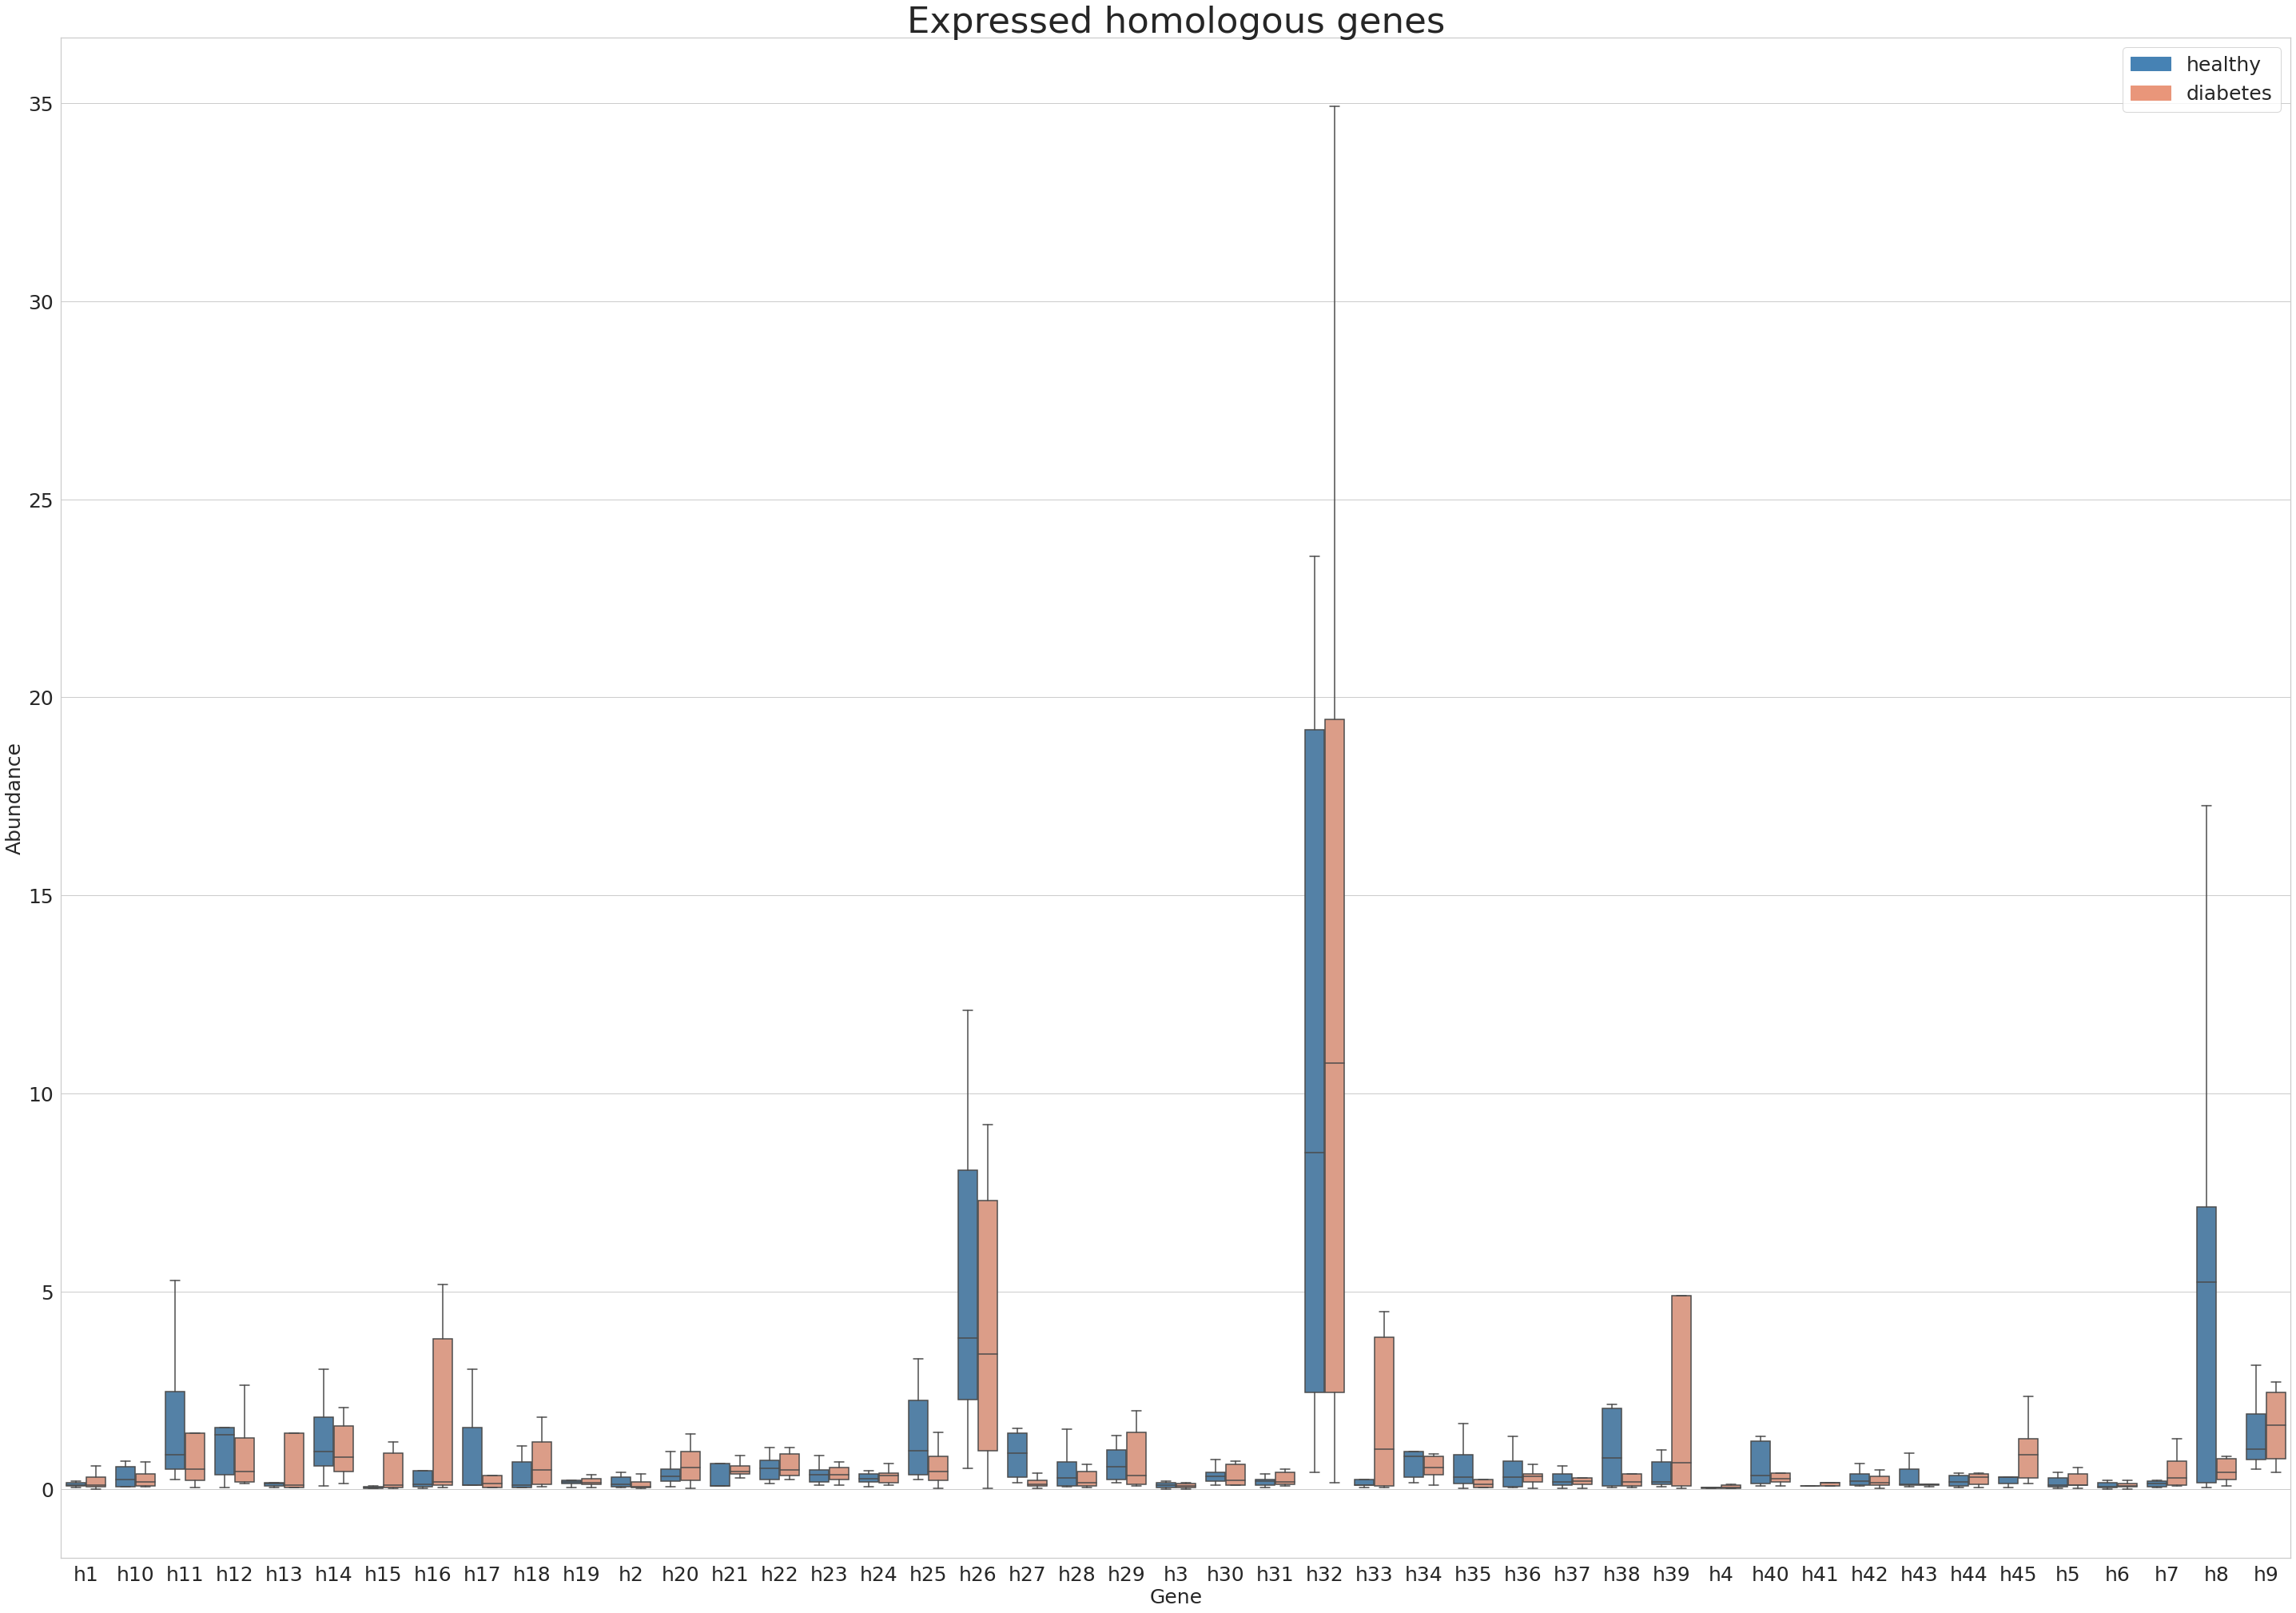

In [78]:
sns.set(style="whitegrid",
       rc={'figure.figsize':(50, 35)})

ax = sns.boxplot(x="chrom", y="mean_abundance", data=expression_processed, showfliers = False, hue='diabetes',
                palette = {"no": "steelblue", "yes": "darksalmon"})
# ax = sns.swarmplot(x="gene", y="tpm", data=expression_processed, color=".25")
# ax.set_title('u18', fontsize = 25)
ax.set_title('Expressed homologous genes', fontsize = 45)
ax.set_xlabel('Gene', fontsize=25)
ax.set_ylabel('Abundance', fontsize=25)
ax.tick_params(labelsize=25)

no = mpatches.Patch(color='steelblue', label='healthy')
yes = mpatches.Patch(color='darksalmon', label='diabetes')
ax.legend(handles=[no, yes], fontsize=25)

#### Fisher's test

In [76]:
pval = []

for v in expression_processed.chrom.unique():
    exp_healthy = expression_processed[(expression_processed.chrom == v) 
                                   & (expression_processed.diabetes == 'no')].shape[0]
    exp_disease = expression_processed[(expression_processed.chrom == v) 
                                   & (expression_processed.diabetes == 'yes')].shape[0]
    
    data = [[exp_healthy, 18 - exp_healthy],
       [exp_disease, 17 - exp_disease]]
    
    print('for', v, "p_value: ", stats.fisher_exact(data)[1])
    
    pval.append(stats.fisher_exact(data)[1])
    

for h1 p_value:  0.3052667214779702
for h10 p_value:  0.7246718576195781
for h11 p_value:  0.4705228031145722
for h12 p_value:  1.0
for h13 p_value:  0.49979203946413836
for h14 p_value:  0.2642329861462226
for h15 p_value:  0.09434259564152192
for h16 p_value:  0.5050852453957362
for h17 p_value:  0.035415011388315105
for h18 p_value:  0.3175386015456987
for h19 p_value:  0.30526672147797035
for h2 p_value:  0.3052667214779702
for h20 p_value:  0.48867630700778575
for h21 p_value:  0.17558317615385843
for h22 p_value:  0.3052667214779702
for h23 p_value:  0.3052667214779702
for h24 p_value:  0.3052667214779702
for h25 p_value:  0.3052667214779702
for h26 p_value:  0.3052667214779702
for h27 p_value:  0.7332224210475399
for h28 p_value:  0.5050852453957362
for h29 p_value:  0.7332224210475399
for h3 p_value:  0.4997920394641386
for h30 p_value:  0.4997920394641386
for h31 p_value:  0.17558317615385843
for h32 p_value:  0.48571428571428554
for h33 p_value:  0.7379863063859777
for h34 p_

In [77]:
multipletests(pval)

/work/projects/archaea_neurodeg/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.99999133, 0.99999133, 0.99999133, 1.        , 0.99999133,
        0.99995997, 0.98280974, 0.99999133, 0.80261123, 0.99999133,
        0.99999133, 0.99999133, 0.99999133, 0.999349  , 0.99999133,
        0.99999133, 0.99999133, 0.99999133, 0.99999133, 0.99999133,
        0.99999133, 0.99999133, 0.99999133, 0.99999133, 0.999349  ,
        0.99999133, 0.99999133, 0.99999133, 0.99999133, 0.99999133,
        1.        , 1.        , 0.99999133, 0.98280974, 0.98069071,
        0.98069071, 0.98280974, 0.99999133, 0.999349  , 0.99999133,
        0.99908304, 0.999349  , 0.999349  , 0.99999133, 0.99999133]),
 0.0011392016030112861,
 0.00

## MT reads' expression filtered for only archaeal reads

In [11]:
expression = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/\
mapping/gene_expression/gene_expression_homo_bac_filtered.tsv',\
                          encoding='utf8')

In [12]:
expression

sample  chrom  length  bases  mean  min  max
0   M05-02-V1  h8_b   477     3953   8.29  2    16 
1   M05-02-V2  h8_b   477     719    1.51  0    5  
2   M05-03-V3  h27_b  831     469    0.56  0    3  
3   M05-04-V1  h19_b  456     55     0.12  0    1  
4   M06-01-V1  h12_b  399     598    1.50  0    6  
..        ...    ...  ...     ...     ... ..   ..  
86  M4.6-V2    h11_b  420     302    0.72  0    2  
87  M4.6-V2    h12_b  399     1459   3.66  1    7  
88  M4.6-V2    h27_b  831     859    1.03  0    4  
89  M4.6-V3    h8_b   477     1580   3.31  0    8  
90  M4.6-V3    h27_b  831     1207   1.45  0    5  

[91 rows x 7 columns]

In [13]:
df = expression['sample'].str.split('-').str[0]
expression['sample'] = df

In [14]:
expression

sample  chrom  length  bases  mean  min  max
0   M05    h8_b   477     3953   8.29  2    16 
1   M05    h8_b   477     719    1.51  0    5  
2   M05    h27_b  831     469    0.56  0    3  
3   M05    h19_b  456     55     0.12  0    1  
4   M06    h12_b  399     598    1.50  0    6  
..  ...      ...  ...     ...     ... ..   ..  
86  M4.6   h11_b  420     302    0.72  0    2  
87  M4.6   h12_b  399     1459   3.66  1    7  
88  M4.6   h27_b  831     859    1.03  0    4  
89  M4.6   h8_b   477     1580   3.31  0    8  
90  M4.6   h27_b  831     1207   1.45  0    5  

[91 rows x 7 columns]

In [15]:
expression_processed = expression.groupby(['chrom', 'sample'], as_index=False)\
.agg({'mean':'mean'})\
.rename(columns={'mean':'mean_abundance'}).round(2)

expression_processed.head()

chrom sample  mean_abundance
0  h11_b  M11    3.39          
1  h11_b  M2.2   2.40          
2  h11_b  M2.4   0.58          
3  h11_b  M2.5   0.72          
4  h11_b  M3.4   0.80

In [16]:
gene_abundance = expression_processed.groupby(['chrom'], as_index=False).agg({'mean_abundance':'mean'})
gene_abundance = gene_abundance.iloc[natsort.index_humansorted(gene_abundance['chrom'])]
gene_abundance.head()

chrom  mean_abundance
8  h8_b   5.843333      
9  h9_b   0.660000      
0  h11_b  2.431111      
1  h12_b  2.335833      
2  h13_b  2.560000

In [10]:
gene_abundance.round(2) # arch

chrom  mean_abundance
8  h8_a   1.75          
9  h9_a   1.91          
0  h11_a  1.61          
1  h12_a  1.73          
2  h13_a  4.63          
3  h19_a  0.36          
4  h20_a  0.17          
5  h26_a  0.51          
6  h27_a  1.65          
7  h28_a  1.48

In [17]:
gene_abundance.round(2) # bac

chrom  mean_abundance
8  h8_b   5.84          
9  h9_b   0.66          
0  h11_b  2.43          
1  h12_b  2.34          
2  h13_b  2.56          
3  h19_b  0.26          
4  h20_b  0.18          
5  h26_b  0.36          
6  h27_b  1.08          
7  h28_b  1.34

# Gene expression of flanking genes around spoV genes

## h9

In [208]:
gene_type = 'h9'

expression = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/\
mapping/gene_expression/gene_expression_spoV_flanking_'+gene_type+'.tsv',\
                          encoding='utf8')

In [209]:
expression

sample           chrom  length  bases   mean  min  max
0    M05-01-V1  h9.1_None_1     258     619    2.40   1    5  
1    M05-01-V1  h9.1_K00943_2   561     723    1.29   0    6  
2    M05-01-V1  h9.1_K18678_3   654     990    1.51   0    4  
3    M05-01-V1  h9.1_K11781_4   1152    15286  13.27  0    54 
4    M05-01-V1  h9.1_K06407_6   351     39     0.11   0    1  
..         ...            ...   ...     ..      ...  ..   ..  
176  M4.6-V3    h9.2_K06406_7   996     268    0.27   0    7  
177  M4.6-V3    h9.2_K06405_8   474     77     0.16   0    2  
178  M4.6-V3    h9.2_K06409_9   1044    59     0.06   0    1  
179  M4.6-V3    h9.2_K00878_10  864     1545   1.79   0    6  
180  M4.6-V3    h9.2_K00788_11  630     2997   4.76   0    12 

[181 rows x 7 columns]

In [210]:
expression['gene'] = expression['chrom'].str.split('h9.').str[1]

In [211]:
expression

sample           chrom  length  bases   mean  min  max         gene
0    M05-01-V1  h9.1_None_1     258     619    2.40   1    5    1_None_1   
1    M05-01-V1  h9.1_K00943_2   561     723    1.29   0    6    1_K00943_2 
2    M05-01-V1  h9.1_K18678_3   654     990    1.51   0    4    1_K18678_3 
3    M05-01-V1  h9.1_K11781_4   1152    15286  13.27  0    54   1_K11781_4 
4    M05-01-V1  h9.1_K06407_6   351     39     0.11   0    1    1_K06407_6 
..         ...            ...   ...     ..      ...  ..   ..           ... 
176  M4.6-V3    h9.2_K06406_7   996     268    0.27   0    7    2_K06406_7 
177  M4.6-V3    h9.2_K06405_8   474     77     0.16   0    2    2_K06405_8 
178  M4.6-V3    h9.2_K06409_9   1044    59     0.06   0    1    2_K06409_9 
179  M4.6-V3    h9.2_K00878_10  864     1545   1.79   0    6    2_K00878_10
180  M4.6-V3    h9.2_K00788_11  630     2997   4.76   0    12   2_K00788_11

[181 rows x 8 columns]

In [212]:
expression_processed = expression.groupby(['gene'], as_index=False)\
.agg({'mean':'mean'})\
.rename(columns={'mean':'mean_expression'}).round(2)

expression_processed.head()

gene  mean_expression
0  1_K00943_2   1.18           
1  1_K03059_11  4.26           
2  1_K03265_10  3.19           
3  1_K06405_8   0.19           
4  1_K06406_7   0.17

In [213]:
expression_processed['seq_order'] = expression_processed['gene'].str.split('_').str[0]
expression_processed['kegg'] = expression_processed['gene'].str.split('_').str[1]
expression_processed['gene_order'] = expression_processed['gene'].str.split('_').str[2]

In [214]:
expression_processed['gene_order'] = expression_processed['gene_order'].astype(int)
expression_processed['seq_order'] = expression_processed['seq_order'].astype(int) 

In [215]:
expression_2plot = expression_processed[['seq_order', 'kegg', 'gene_order', 'mean_expression']]\
.sort_values(['seq_order', 'gene_order', 'kegg'])

In [216]:
expression_2plot[expression_2plot.seq_order == 1]

seq_order    kegg  gene_order  mean_expression
9   1          None    1           3.37           
0   1          K00943  2           1.18           
7   1          K18678  3           2.77           
6   1          K11781  4           2.98           
8   1          K23978  5           0.18           
5   1          K06407  6           0.53           
4   1          K06406  7           0.17           
3   1          K06405  8           0.19           
10  1          None    9           10.10          
2   1          K03265  10          3.19           
1   1          K03059  11          4.26

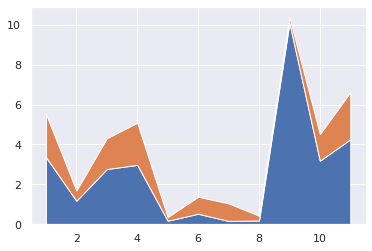

In [217]:
sns.set_theme()
plt.stackplot(expression_2plot[expression_2plot.seq_order == 1].gene_order, 
              expression_2plot[expression_2plot.seq_order == 1].mean_expression,
             expression_2plot[expression_2plot.seq_order == 2].mean_expression)

In [218]:
df2plot_1 = expression_2plot[expression_2plot.seq_order == 1]
df2plot_2 = expression_2plot[expression_2plot.seq_order == 2]

In [219]:
df2plot_1

seq_order    kegg  gene_order  mean_expression
9   1          None    1           3.37           
0   1          K00943  2           1.18           
7   1          K18678  3           2.77           
6   1          K11781  4           2.98           
8   1          K23978  5           0.18           
5   1          K06407  6           0.53           
4   1          K06406  7           0.17           
3   1          K06405  8           0.19           
10  1          None    9           10.10          
2   1          K03265  10          3.19           
1   1          K03059  11          4.26

In [220]:
df2plot_1.mean_expression

9     3.37 
0     1.18 
7     2.77 
6     2.98 
8     0.18 
5     0.53 
4     0.17 
3     0.19 
10    10.10
2     3.19 
1     4.26 
Name: mean_expression, dtype: float64

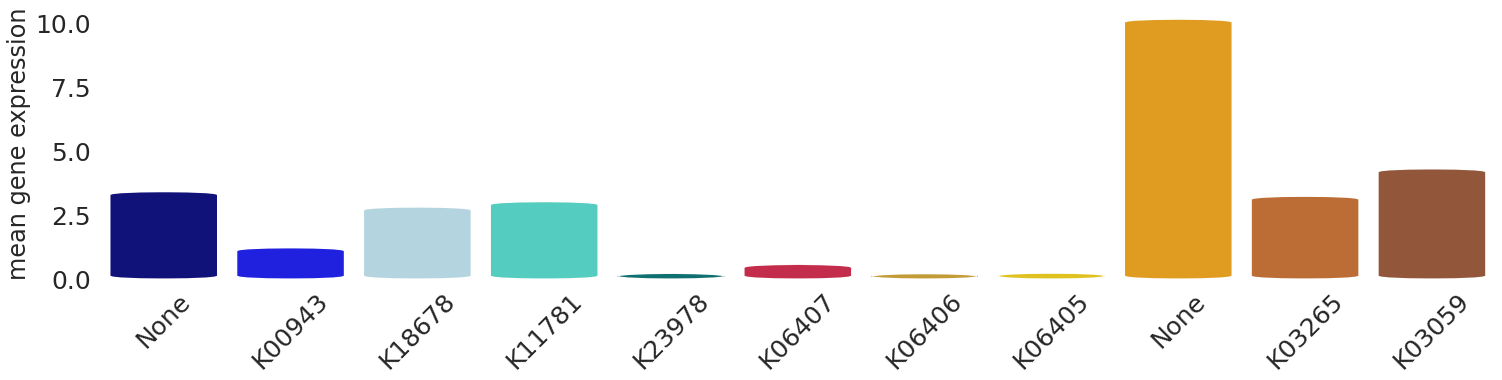

In [227]:
sns.set_style('white')

colors = ['darkblue', 'blue', 'lightblue', 'turquoise', 'teal', 'crimson', 
          'goldenrod', 'gold', 'orange', 'chocolate', 'sienna']

plt.subplots(figsize=(25, 5))

ax = sns.barplot(x=df2plot_1.gene_order, y=df2plot_1.mean_expression, palette=colors)

new_patches = []
for patch in reversed(ax.patches):
    # print(bb.xmin, bb.ymin,abs(bb.width), abs(bb.height))
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = mpatches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.02,rounding_size=0.6",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)
    
sns.despine(left=True, bottom=True)

ax.set_xticks(range(len(df2plot_1)) ,labels=df2plot_1.kegg, rotation=45)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('', fontsize = 24)
ax.set_ylabel('mean gene expression', fontsize = 24)
ax.grid(visible=True, which='minor', color='b', linewidth=0.5)


# plt.grid(axis='y') 

pics_dir = "/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs"
    
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.pdf', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.eps', dpi=400, bbox_inches = 'tight')
plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.png', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.svg', dpi=400, bbox_inches = 'tight')

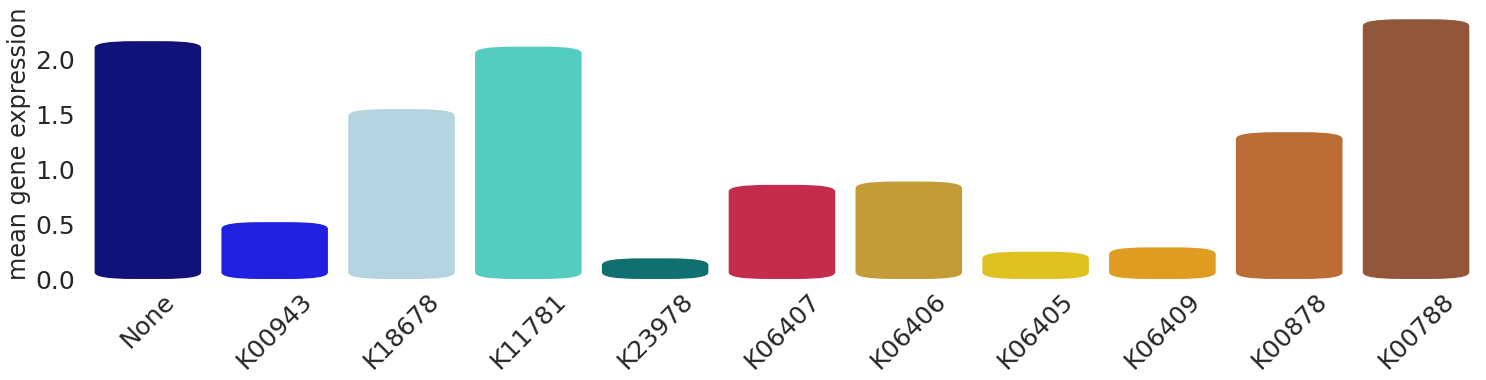

In [222]:
sns.set_style('white')

colors = ['darkblue', 'blue', 'lightblue', 'turquoise', 'teal', 'crimson', 
          'goldenrod', 'gold', 'orange', 'chocolate', 'sienna']

plt.subplots(figsize=(25, 5))

ax = sns.barplot(x=df2plot_2.gene_order, y=df2plot_2.mean_expression, palette=colors)

new_patches = []
for patch in reversed(ax.patches):
    # print(bb.xmin, bb.ymin,abs(bb.width), abs(bb.height))
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = mpatches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.02,rounding_size=0.3",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)
    
sns.despine(left=True, bottom=True)

ax.set_xticks(range(len(df2plot_2)) ,labels=df2plot_2.kegg, rotation=45)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('', fontsize = 24)
ax.set_ylabel('mean gene expression', fontsize = 24)
ax.grid(visible=True, which='minor', color='b', linewidth=0.5)

# plt.grid(axis='y') 

pics_dir = "/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs"
    
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.2.pdf', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.2.eps', dpi=400, bbox_inches = 'tight')
plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.2.png', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.2.svg', dpi=400, bbox_inches = 'tight')

## h20

In [164]:
gene_type = 'h20'

expression = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/\
mapping/gene_expression/gene_expression_spoV_flanking_'+gene_type+'.tsv',\
                          encoding='utf8')

In [165]:
expression

sample     chrom  length  bases   mean  min  max
0    M05-01-V1  h20.3_1   828     4750   5.74   1    9  
1    M05-01-V1  h20.3_2   588     90     0.15   0    1  
2    M05-01-V1  h20.3_3   609     7073   11.61  2    19 
3    M05-01-V1  h20.3_4   720     15515  21.55  0    32 
4    M05-01-V1  h20.3_6   1002    98     0.10   0    4  
..         ...      ...    ...    ..      ...  ..   ..  
917  M4.6-V3    h20.2_7   465     19     0.04   0    1  
918  M4.6-V3    h20.2_8   252     699    2.77   0    6  
919  M4.6-V3    h20.2_9   195     1029   5.28   3    8  
920  M4.6-V3    h20.2_10  471     2265   4.81   0    9  
921  M4.6-V3    h20.2_11  1152    7828   6.80   0    16 

[922 rows x 7 columns]

In [166]:
expression['gene'] = expression['chrom'].str.split('h20.').str[1]

In [167]:
expression['chrom'].str.split('h20.')

0      [, 3_1] 
1      [, 3_2] 
2      [, 3_3] 
3      [, 3_4] 
4      [, 3_6] 
        ...    
917    [, 2_7] 
918    [, 2_8] 
919    [, 2_9] 
920    [, 2_10]
921    [, 2_11]
Name: chrom, Length: 922, dtype: object

In [168]:
expression_processed = expression.groupby(['gene'], as_index=False)\
.agg({'mean':'mean'})\
.rename(columns={'mean':'mean_expression'}).round(2)

expression_processed.head()

gene  mean_expression
0  1_1   0.56           
1  1_10  11.98          
2  1_11  0.90           
3  1_2   0.41           
4  1_3   1.36

In [169]:
expression_processed['seq_order'] = expression_processed['gene'].str.split('_').str[0]
# expression_processed['kegg'] = expression_processed['gene'].str.split('_').str[1]
expression_processed['gene_order'] = expression_processed['gene'].str.split('_').str[1]

In [171]:
expression_processed['gene_order'] = expression_processed['gene_order'].astype(int)
expression_processed['seq_order'] = expression_processed['seq_order'].astype(int) 

In [172]:
expression_2plot = expression_processed[['seq_order', 'gene_order', 'mean_expression']]\
.sort_values(['seq_order', 'gene_order'])

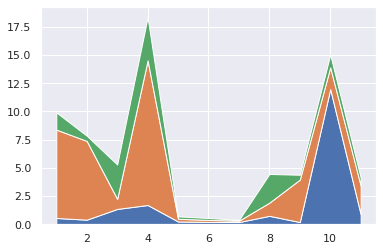

In [174]:
sns.set_theme()
plt.stackplot(expression_2plot[expression_2plot.seq_order == 1].gene_order, 
              expression_2plot[expression_2plot.seq_order == 1].mean_expression,
             expression_2plot[expression_2plot.seq_order == 2].mean_expression,
             expression_2plot[expression_2plot.seq_order == 3].mean_expression)

In [178]:
df2plot_1 = expression_2plot[expression_2plot.seq_order == 2]
df2plot_2 = expression_2plot[expression_2plot.seq_order == 3]
df2plot_3 = expression_2plot[expression_2plot.seq_order == 1]

In [187]:
df2plot_1['kegg'] = ['K03657','K06872', 'K13735', 'K19091', 'K06405', 'K06406', 
                     'K06407', 'K05967', 'None', 'K00790', 'K02323']
df2plot_2['kegg'] = ['None', 'K02230', 'K20485', 'K07497', 'K06407', 'K06406', 
                     'K06405', 'K00943', 'K18678', 'K18678', 'K11781']
df2plot_3['kegg'] = ['None', 'K21463', 'K21463', 'K21463', 'K06407', 'K06406', 
                     'K06405', 'K22026', 'K21900', 'K16180', 'None']

/tmp/ipykernel_2502701/4195089467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2plot_1['kegg'] = ['K03657','K06872', 'K13735', 'K19091', 'K06405', 'K06406',
/tmp/ipykernel_2502701/4195089467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2plot_2['kegg'] = ['None', 'K02230', 'K20485', 'K07497', 'K06407', 'K06406',
/tmp/ipykernel_2502701/4195089467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

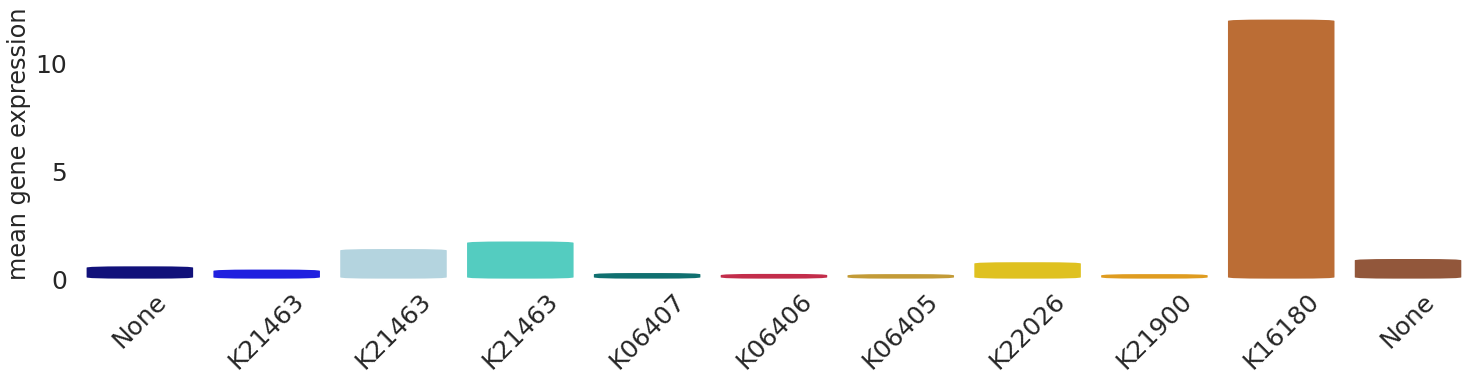

In [191]:
sns.set_style('white')

colors = ['darkblue', 'blue', 'lightblue', 'turquoise', 'teal', 'crimson', 
          'goldenrod', 'gold', 'orange', 'chocolate', 'sienna']

plt.subplots(figsize=(25, 5))

ax = sns.barplot(x=df2plot_3.gene_order, y=df2plot_3.mean_expression, palette=colors)

new_patches = []
for patch in reversed(ax.patches):
    # print(bb.xmin, bb.ymin,abs(bb.width), abs(bb.height))
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = mpatches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.02,rounding_size=0.3",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)
    
sns.despine(left=True, bottom=True)

ax.set_xticks(range(len(df2plot_3)) ,labels=df2plot_3.kegg, rotation=45)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('', fontsize = 24)
ax.set_ylabel('mean gene expression', fontsize = 24)
ax.grid(visible=True, which='minor', color='b', linewidth=0.5)

# plt.grid(axis='y') 

pics_dir = "/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs"
    
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.pdf', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.eps', dpi=400, bbox_inches = 'tight')
plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h20.3.png', dpi=400, bbox_inches = 'tight')
# plt.savefig('/work/projects/archaeome/coevolution/synteny/dig_sporulation/pics/separate_seqs/expression_h9.1.svg', dpi=400, bbox_inches = 'tight')